# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://catalog.data.gov/dataset/alzheimers-disease-and-healthy-aging-data

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [2]:
# Pre-filtered the overall excel file down to the two questions I want to analyze from the survey data.
# So the file I'm importing is already a filtered dataset from the main dataset.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("./filtered-dataset.csv")

# Looks like 0 duplicated rows
df.duplicated().sum()

df.columns

# Columns
list = ['RowId', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
       'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID',
       'LocationID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2']



In [3]:
column_dict = {
	"id": 'RowId',
	"y_start": "YearStart",
	"y_end": "YearEnd",
	"location_abbrev": "LocationAbbr",
	"location_desc": "LocationDesc",
	"class": "Class",
	"topic": "Topic",
	"question": "Question",
	"q_id": "QuestionID",
	"dv_type": "Data_Value_Type",
	"data_value": "Data_Value",
	"df_footnote": "Data_Value_Footnote",
	"low_conf_limit": "Low_Confidence_Limit",
	"high_conf_limit": "High_Confidence_Limit",
	"strat_cat_1": "StratificationCategory1",
	"strat_1_value": "Stratification1",
	"strat_cat_2": "StratificationCategory2",
	"strat_2_value": "Stratification2",
	"geolocation": "Geolocation",
	"location_id": "LocationID"
	}

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [113]:
# Is each row of my dataset an individual data point, or is it representing an aggregation (average, sum, etc.) of a dataset.
	## Each row represents an aggregation of survey responses for a given geographic region


In [114]:
## Unique locations
## Are there regions mixed in with specific states in the data? -- YES

unique_vals = df[column_dict['location_desc']].unique()
unique_vals.sort()

print(unique_vals)


['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Midwest'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Northeast' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South' 'South Carolina' 'South Dakota'
 'Tennessee' 'Texas' 'United States, DC & Territories' 'Utah' 'Vermont'
 'Virgin Islands' 'Virginia' 'Washington' 'West' 'West Virginia'
 'Wisconsin' 'Wyoming']


In [115]:
## Unique Age groups, Race/Ethnicity, Gender reported on for these two questions
# filtered_df = df[df['City'] == 'New York']
category = "Age Group"

filtered_to_cat = df[df[column_dict['strat_cat_1']] == category]

filtered_to_cat[column_dict['strat_1_value']].unique()



array(['50-64 years', '65 years or older', 'Overall'], dtype=object)

In [116]:
## Unique Race/Ethnicity, 

category = 'Race/Ethnicity'

filtered_to_cat = df[df[column_dict['strat_cat_2']] == category]

filtered_to_cat[column_dict['strat_2_value']].unique()

array(['Asian/Pacific Islander', 'Hispanic', 'Native Am/Alaskan Native',
       'Black, non-Hispanic', 'White, non-Hispanic'], dtype=object)

In [117]:
## Unique Gender reported on for these two questions
category = 'Gender'

filtered_to_cat = df[df[column_dict['strat_cat_2']] == category]

filtered_to_cat[column_dict['strat_2_value']].unique()

array(['Female', 'Male'], dtype=object)

In [118]:
## Number of 'No Data Available' rows in the dataset for these questions

row_val = "No Data Available"

count_no_data = df[df[column_dict['df_footnote']] == row_val][column_dict['df_footnote']].count()

In [119]:
## Number of rows with no data due to sample size warning
row_val = "Sample size of denominator and/or age group for age-standardization is less than 50 or relative standard error is more than 30%"

count_sample_warning = df[df[column_dict['df_footnote']] == row_val][column_dict['df_footnote']].count()


total_no_data = count_no_data + count_sample_warning
print(total_no_data)

num_total_records = df[column_dict['id']].count()
print(num_total_records)

percent_missing = round((total_no_data / num_total_records) * 100, 2)
print(percent_missing)

# Total rows with data
print(num_total_records - total_no_data)
# when I move on to cleaning data, going to filter these no data rows out of dataset

6095
16287
37.42
10192


In [120]:
# Value data types in dataset

df[column_dict['dv_type']].unique()

array(['Percentage'], dtype=object)

In [121]:
## <Important> Need to research what these High and Low confidence values mean

# A low confidence limit (often referred to as the lower bound) is the lowest value in this range, 
##  while a high confidence limit (or upper bound) is the highest value. 
## Together, these limits form a confidence interval, 
## which provides an estimate of uncertainty around the parameter.

In [122]:
## Unique Location values for rows with data and rows without data

row_val_1 = "No Data Available"
row_val_2 = "Sample size of denominator and/or age group for age-standardization is less than 50 or relative standard error is more than 30%"

exclude = [row_val_1, row_val_2]


location_with_data_filtered_df = df[~df[column_dict['df_footnote']].isin(exclude)]
# Locations with data
locations_with_data = location_with_data_filtered_df[column_dict['location_desc']].unique()

locations_no_data_df = df[df[column_dict['df_footnote']].isin(exclude)]
locations_without_data = locations_no_data_df[column_dict['location_desc']].unique()


print(len(locations_with_data))
print(len(locations_without_data))

# All unique locations seem to have rows with data and rows without data


59
59


In [123]:
## See how filled out dataset is for both questions. Does one have more data than the other? That'd be an important thing to note in final 
### Tableau report if so. 
## What are the number of complete responses for each question? Can I compare them, or is one question much more answered than the other?

binge_drink_q = ["Percentage of older adults who reported binge drinking within the past 30 days", "Q21"]
expected_caretaker_1 = ["Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years", "Q37"]

row_val_1 = "No Data Available"
row_val_2 = "Sample size of denominator and/or age group for age-standardization is less than 50 or relative standard error is more than 30%"

exclude = [row_val_1, row_val_2]


binge_q_filtered_df = df[df[column_dict['q_id']] == binge_drink_q[1]]
expected_caretaker_q_filtered_df = df[df[column_dict['q_id']] == expected_caretaker_1[1]]


binge_q_rows_with_data = binge_q_filtered_df[~binge_q_filtered_df[column_dict['df_footnote']].isin(exclude)]
binge_q_count = binge_q_rows_with_data[column_dict['id']].count()

expected_caretaker_q_rows_with_data = expected_caretaker_q_filtered_df[~expected_caretaker_q_filtered_df[column_dict['df_footnote']].isin(exclude)]
expect_care_q_count = expected_caretaker_q_rows_with_data[column_dict['id']].count()


print(binge_q_count, expect_care_q_count)


# Binge drink questions has almost twice the number of rows with data as expected caretaker question
## I'll need to include a note about this in final Tableau report so I don't misrepresent possible relationships
## between the response data of these two questions



6640 3552


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

Text(0.5, 0, 'Number of rows with data')

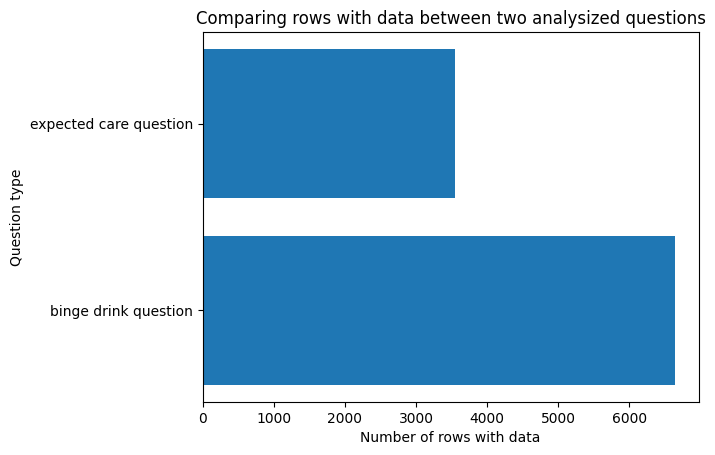

In [124]:

# Horizontal bar chart
keys = ['binge drink question', 'expected care question']

values = [binge_q_count, expect_care_q_count]



plt.barh(keys, values, align='center')
plt.title("Comparing rows with data between two analysized questions")
plt.ylabel("Question type")
plt.xlabel("Number of rows with data")

Text(0.5, 0, 'Count rows')

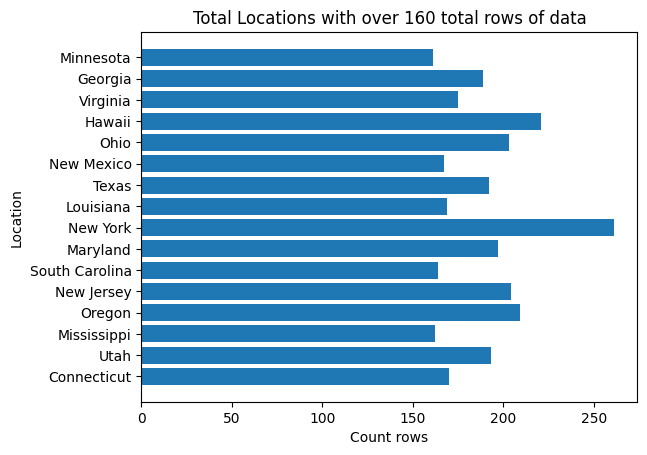

In [130]:
# Code Here
keys = locations_with_data

values = []

# in billions
for k in keys:
	ldf = location_with_data_filtered_df
	sum = int(ldf[ldf[column_dict['location_desc']] == k][column_dict['id']].count())
	values.append(sum)


threshold = 160
keys_over_threshold = []
values_over_threshold = []

exclude = ['Midwest', 'South', 'Northeast', 'United States, DC & Territories', 'West']


for index,v in enumerate(keys):
	if values[index] > threshold and v not in exclude:
		keys_over_threshold.append(v)
		values_over_threshold.append(values[index])


plt.barh(keys_over_threshold, values_over_threshold, align='center')
plt.title("Total Locations with over 160 total rows of data")
plt.ylabel("Location")
plt.xlabel("Count rows")

Text(0.5, 0, 'Count rows')

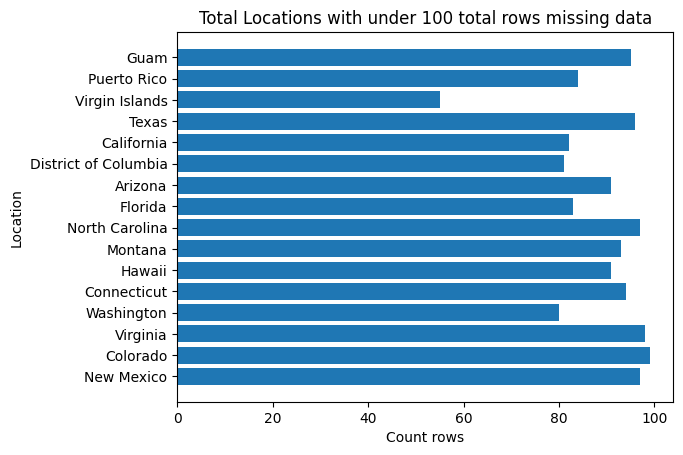

In [131]:
# Code Here
keys = locations_without_data

values = []

# in billions
for k in keys:
	ldf = locations_no_data_df
	sum = int(ldf[ldf[column_dict['location_desc']] == k][column_dict['id']].count())
	values.append(sum)


threshold = 100
keys_over_threshold = []
values_over_threshold = []

exclude = ['Midwest', 'South', 'Northeast', 'United States, DC & Territories', 'West']


for index,v in enumerate(keys):
	if values[index] < threshold and v not in exclude:
		keys_over_threshold.append(v)
		values_over_threshold.append(values[index])


plt.barh(keys_over_threshold, values_over_threshold, align='center')
plt.title("Total Locations with under 100 total rows missing data")
plt.ylabel("Location")
plt.xlabel("Count rows")

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 

	Difference in response data collected across two questions

2. Do you have any concerns about your dataset? 

	Difference in response data collected across two questions

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

	Difference in response data collected across two questions

	Filter out non-response rows in dataset, and make sure to make note of that in final Tableau report